In [27]:
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data = pd.read_csv('../data/all_tickets.csv')

In [17]:
text_list = data['body'].tolist()

In [18]:
def clean(sentence):
    
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer() 
  
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]  

    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]

    return ' '.join(stemmed_sentence)

In [19]:
text_list = [clean(sentence) for sentence in text_list]

In [20]:
labels_list = data['category'].tolist()

In [21]:
labels_list = ["__label__" + str(label) for label in labels_list]

(array([3.4061e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6280e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 9.6340e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.2100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1200e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.3900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.3700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

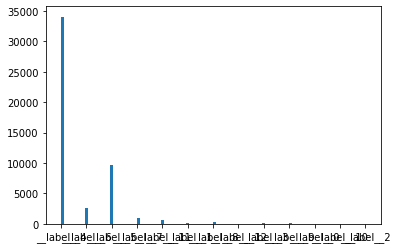

In [24]:
plt.hist(labels_list, bins=100)

In [25]:
n_outputs = len(np.unique(labels_list)) # dimensione dell'output
n_outputs

13

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(text_list, labels_list, test_size=0.1, random_state=42)

In [31]:
with open("tickets.train", "a") as train_file:
    for x, y in zip(X_train, Y_train):
        train_file.write(str(y) + " " + str(x) + "\n")

In [32]:
with open("tickets.valid", "a") as train_file:
    for x, y in zip(X_test, Y_test):
        train_file.write(str(y) + " " + str(x) + "\n")

In [48]:
model = fasttext.train_supervised(input="tickets.train", lr=0.5, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='ova')

In [49]:
model.predict("dsfasdf sd f asd fasd erf wer e rqwe r we r wer qwe r ")

(('__label__4',), array([1.00001001]))

In [50]:
model.test("tickets.valid")

(4855, 0.835221421215242, 0.835221421215242)